# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es categórica, asi que no habrá que reescalar con funciones como el logaritmo.

In [1]:
# Carga de librerías, las que hemos considerado basicas, añadid lo que querais :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA

### Leer conjunto de datos y primer vistazo

In [2]:
# Leer el CSV y ver un simple head
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

### Exploración de datos 

In [4]:
# Descripcion del conjunto de datos, estandar
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# Informacion sobre el tipo de datos de cada feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Calcular el número de nulos de cada feature

In [6]:
# Igual que otras veces, una linea, contar los nulos por variable
print('Null data:')
for feature in df:
    print('\t{:25} : {:1}'.format(feature, df.shape[0]-df.count()[feature]))

Null data:
	class                     : 0
	cap-shape                 : 0
	cap-surface               : 0
	cap-color                 : 0
	bruises                   : 0
	odor                      : 0
	gill-attachment           : 0
	gill-spacing              : 0
	gill-size                 : 0
	gill-color                : 0
	stalk-shape               : 0
	stalk-root                : 0
	stalk-surface-above-ring  : 0
	stalk-surface-below-ring  : 0
	stalk-color-above-ring    : 0
	stalk-color-below-ring    : 0
	veil-type                 : 0
	veil-color                : 0
	ring-number               : 0
	ring-type                 : 0
	spore-print-color         : 0
	population                : 0
	habitat                   : 0


#### Buscar valores extraños. Para ello, ver los valores distintos en cada feature

In [7]:
# Obtener un nuevo dataframe donde una columna sean los numero_values


#### Tratar aquellos valores que entendamos que sean nulos


In [8]:
# Imputaciones. Podéis quitar esos puntos, imputar con la moda o dejar ese valor como una posibilidad más

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [9]:
# dejar por el camino si procede

#### Separar entre variables predictoras y variables a predecir

In [10]:
# la variable que trata de predecir este conjunto de datos es class
y = df['class']
X = df.drop('class', axis=1)

#### Codificar correctamente las variables categóricas a numéricas

In [11]:
# One hot, es una linea
X = pd.get_dummies(X)
y = y.map({'e': 0, 'p': 1})

#### Train test split, duh ;)

In [12]:
# os lo dejamos a todos igual :)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## PCA

Es un conjunto de datos del que aún no hemos visto nada (no hay dibujitos) así que vamos a hacer algunos. Tenemos el problema de que son muchas variables... Bueno, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

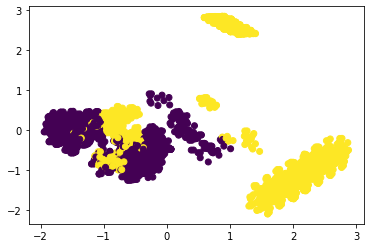

In [13]:
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(X_train)

# representar en un scatterplot y poner en color las etiquetas de entrenamiento
plt.scatter(train_reduced[:,0],train_reduced[:,1] , c=y_train);

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, y para evitar casos como el de la calidad del vino ;), vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Definir el clasificador y el número de estimadores
forest = RandomForestClassifier()
# entrenar en train
forest.fit(X_train, y_train)
# calcular la precisión sobre test
forest.score(X_test, y_test)

1.0

Oh sh*t, resulta que lo clava!! Vuelve arriba, revisa que hayas partido bien la variable predictora, corre!

Naaaah que es broma, está bien, es un conjunto sencillete y Random Forest es muy bueno en su trabajo xD Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [15]:
X_train.shape

(5443, 117)

Ufffffff ¿Muchas features no? Vamos a reducir a ver qué tal.¿Cómo? Venga, mira como se llama la sección, seguro que te da una pista ;)

<AxesSubplot:>

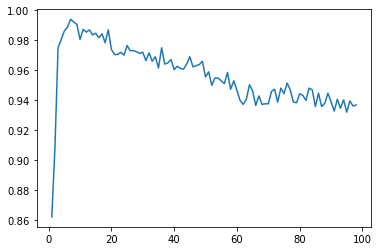

In [151]:
n_features = np.arange(start=1,stop=99)
scores = []

for n in n_features:
    
    # Hacer PCA sobre X_train
    # 1- Definir PCA
    pca = PCA(n_components = n)
    # 2- Aprender PCA sobre X_train
    principal_components = pca.fit_transform(X_train)
    
    # Entrenar Random Forest
    # 1- Definir el RF
    forest = RandomForestClassifier()
    # 2- Entrenar clasificador
    forest.fit(principal_components,y_train)
    
    # Guardar el score
    principal_components_test = pca.fit_transform(X_test)
    scores.append(forest.score(principal_components_test, y_test))
    
sns.lineplot(x=n_features, y=scores);
    

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais




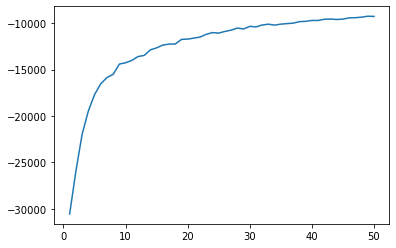

In [16]:
from sklearn.cluster import KMeans

scores = []
k_values = np.arange(start=1, stop=51)
for a in k_values:
    
    # Definir Kmeans y ajustar
    kmeans = KMeans(n_clusters=a)
    kmeans.fit(X_train)
    # Guardar la predicción
    scores.append(kmeans.score(X_test))
sns.lineplot(x=k_values, y=scores);

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``factorplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans

C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


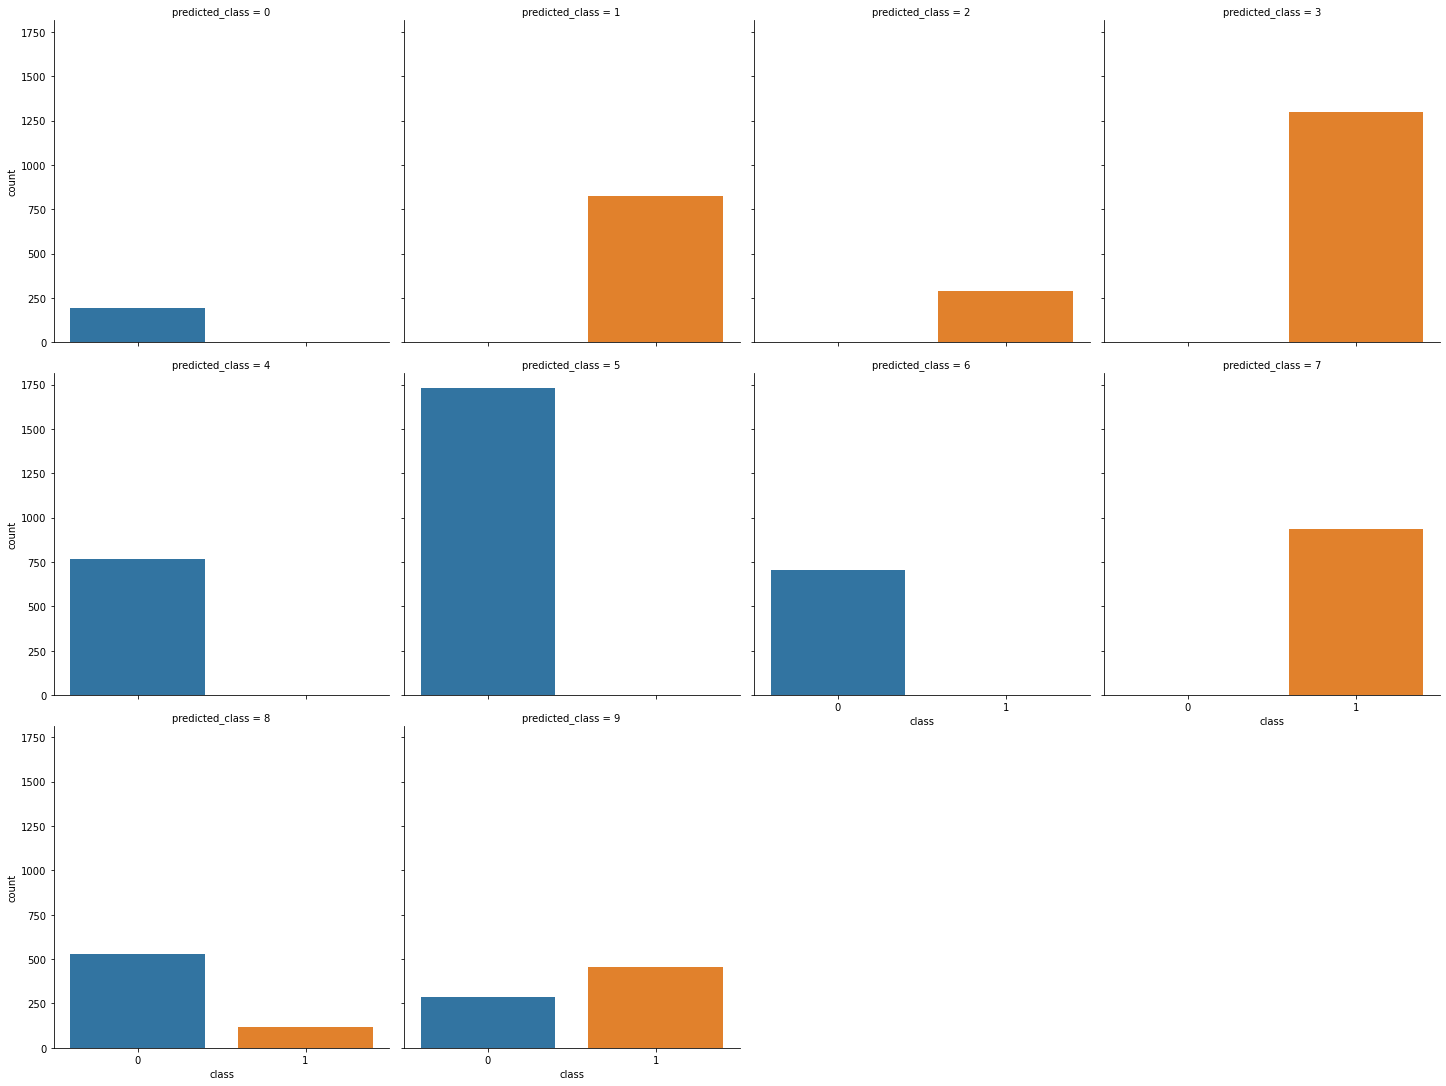

In [27]:
# Aprender Kmeans con el valor de K obtenido

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
results = pd.DataFrame()
results['predicted_class'] = kmeans.labels_
results['class'] = y
# Preparar el factorplot

# Pintar
ax = sns.factorplot(col='predicted_class', x='class', data=results, kind='count',col_wrap=4);

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans

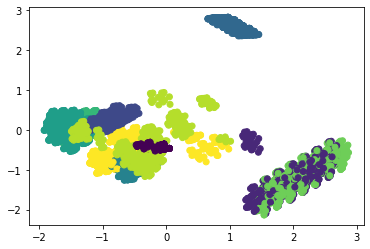

In [36]:
# Entrenar PCA para representar
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
# Representar con los clusters como color 
plt.scatter(principal_components[:,0], principal_components[:,1], c=results.iloc[:,0]);

¿Es bastante parecido no? Tan bueno como el maravilloso Random Forest no es, pero ha conseguido identificar bastante bien los distintos puntos del dataset. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos, el resto de por si nos saca la variable a predecir ya limpia.